TASK 2:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from forex_python.converter import CurrencyRates

In [2]:
# Load the dataset
df = pd.read_csv('task2.csv')
print(df.info())
print("----------------------------------------------------------------------------------------------------------------------")
print(df.head(4))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13972 entries, 0 to 13971
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Work_Year         13972 non-null  int64 
 1   Experience_Level  13972 non-null  object
 2   Employment_Type   13972 non-null  object
 3   Job_Title         13972 non-null  object
 4   Salary            13972 non-null  int64 
 5   Salary_Currency   13972 non-null  object
 6   Remote_Ratio      13972 non-null  int64 
 7   Company_Size      13972 non-null  object
dtypes: int64(3), object(5)
memory usage: 873.4+ KB
None
----------------------------------------------------------------------------------------------------------------------
   Work_Year Experience_Level Employment_Type                  Job_Title  \
0       2024     Senior-Level       Full-Time                AI Engineer   
1       2024     Senior-Level       Full-Time  Machine Learning Engineer   
2       2024     Senior-Leve

In [3]:
# 1. Identify and remove duplicates
duplicate_rows = df[df.duplicated()]
num_duplicates = len(duplicate_rows)
print("Number of duplicates in Step 1:", num_duplicates)
print("----------------------------------------------")
print(duplicate_rows.head(4))
df = df.drop_duplicates()



Number of duplicates in Step 1: 5565
----------------------------------------------
     Work_Year Experience_Level Employment_Type       Job_Title  Salary  \
85        2024     Senior-Level       Full-Time  Data Scientist  212000   
86        2024     Senior-Level       Full-Time  Data Scientist   93300   
106       2024     Senior-Level       Full-Time  Data Scientist  195000   
156       2024     Senior-Level       Full-Time  Data Scientist  110000   

    Salary_Currency  Remote_Ratio Company_Size  
85              USD             0       Medium  
86              USD             0       Medium  
106             USD             0       Medium  
156             USD             0       Medium  


In [4]:
# 2. Identify and handle missing data (NA)
missing_values = df.isnull().sum()
print("Number of missing vales in each column Step 2:")
print(missing_values)
df = df.dropna()

Number of missing vales in each column Step 2:
Work_Year           0
Experience_Level    0
Employment_Type     0
Job_Title           0
Salary              0
Salary_Currency     0
Remote_Ratio        0
Company_Size        0
dtype: int64


In [5]:
# 3. remove data associated with currencies represented fewer than ten times
currency_frequencies = df['Salary_Currency'].value_counts()
currencies_to_keep = currency_frequencies[currency_frequencies >= 10].index
print(currency_frequencies)
df = df[df['Salary_Currency'].isin(currencies_to_keep)]

Salary_Currency
USD    7499
GBP     410
EUR     339
INR      52
CAD      48
AUD      12
PLN       7
CHF       6
SGD       6
JPY       4
BRL       4
DKK       3
HUF       3
TRY       3
NOK       2
THB       2
ZAR       1
HKD       1
ILS       1
PHP       1
NZD       1
MXN       1
CLP       1
Name: count, dtype: int64


In [6]:
# 4. Convert currencies to USD
c = CurrencyRates()
exchange_rates = {currency: c.get_rate(currency, 'USD') for currency in currencies_to_keep}
df['Salary_in_USD'] = df.apply(lambda row: row['Salary'] * exchange_rates[row['Salary_Currency']], axis=1)
df2 = df[df['Salary_Currency'] != 'USD']
print (df2)

       Work_Year Experience_Level Employment_Type                  Job_Title  \
29          2024      Entry-Level       Full-Time               Data Analyst   
30          2024      Entry-Level       Full-Time               Data Analyst   
143         2024     Senior-Level       Full-Time       Data Quality Analyst   
144         2024     Senior-Level       Full-Time       Data Quality Analyst   
243         2023      Entry-Level       Full-Time       Data DevOps Engineer   
...          ...              ...             ...                        ...   
13952       2021        Mid-Level       Full-Time          Lead Data Analyst   
13956       2021        Mid-Level       Full-Time              Data Engineer   
13961       2020     Senior-Level       Full-Time  Machine Learning Engineer   
13965       2021        Mid-Level       Full-Time              Data Engineer   
13971       2021     Senior-Level       Full-Time       Data Science Manager   

        Salary Salary_Currency  Remote_

In [7]:
# 5. Identify the Top 10 Most Popular Job Titles
top_job_titles = df['Job_Title'].value_counts().head(10)
print(top_job_titles)

Job_Title
Data Engineer                1584
Data Scientist               1548
Data Analyst                 1141
Machine Learning Engineer     797
Analytics Engineer            315
Research Scientist            265
Data Architect                224
Research Engineer             177
Data Science                  140
ML Engineer                   134
Name: count, dtype: int64


In [8]:
# 6. Identify the Top 10 Highest Salaries
highest_salaries = df.sort_values(by='Salary_in_USD', ascending=False).head(10)
# print(highest_salaries[['Work_Year','Job_Title', 'Salary_in_USD']])
print(highest_salaries)


      Work_Year Experience_Level Employment_Type                   Job_Title  \
242        2024        Mid-Level       Full-Time                AI Architect   
1085       2024      Entry-Level       Full-Time                Data Analyst   
4936       2023     Senior-Level       Full-Time              Data Scientist   
2060       2024        Mid-Level       Full-Time  Machine Learning Scientist   
3844       2023        Mid-Level       Full-Time  Machine Learning Scientist   
3850       2023        Mid-Level       Full-Time   Machine Learning Engineer   
1884       2024     Senior-Level       Full-Time          Analytics Engineer   
2471       2024     Senior-Level       Full-Time                Data Analyst   
4828       2023        Mid-Level       Full-Time               Data Engineer   
3286       2024        Mid-Level       Full-Time          Research Scientist   

      Salary Salary_Currency  Remote_Ratio Company_Size  Salary_in_USD  
242   800000             USD           100    

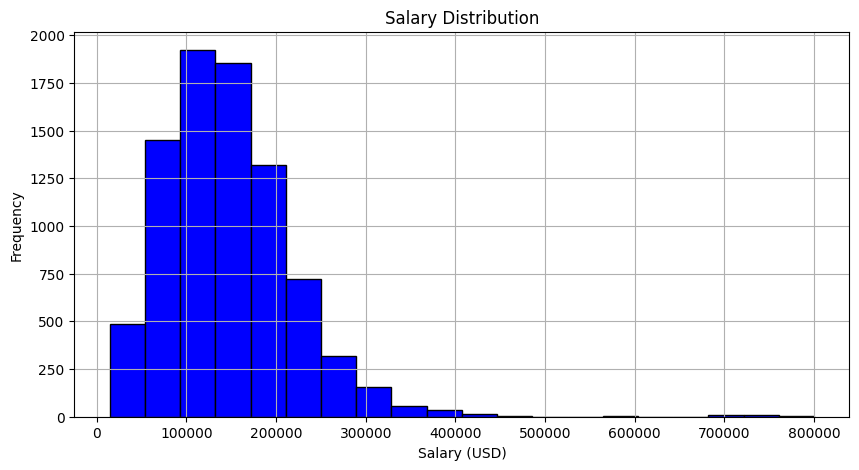

In [9]:
# Salary Distribution (Histogram)
plt.figure(figsize=(10, 5))
plt.hist(df['Salary_in_USD'], bins=20, color='blue', edgecolor='black')
plt.title('Salary Distribution')
plt.xlabel('Salary (USD)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

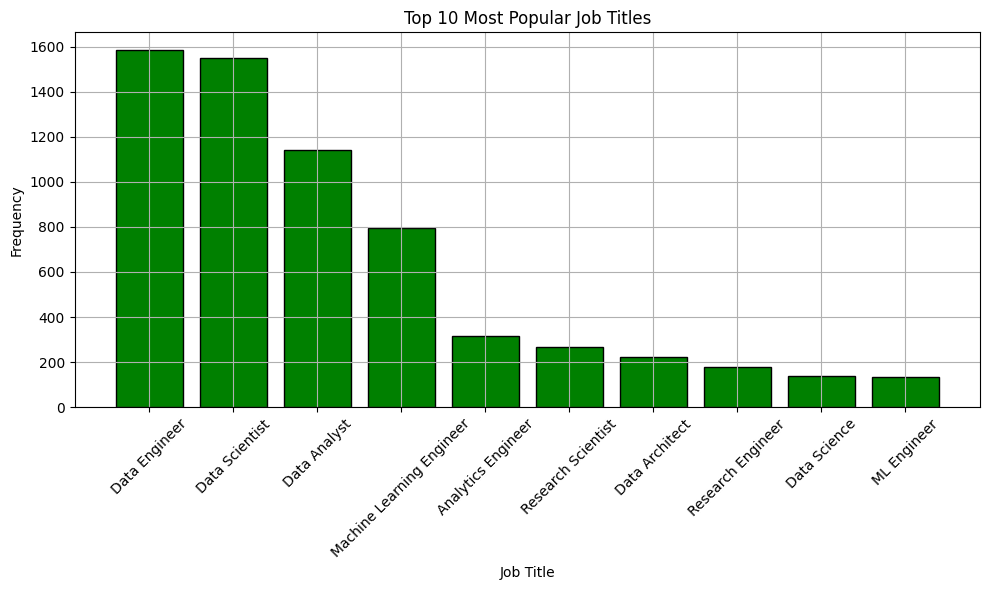

In [10]:
# Job Title Distribution (Bar Plot)
plt.figure(figsize=(10, 6))
job_title_counts = df['Job_Title'].value_counts().head(10)
plt.bar(job_title_counts.index, job_title_counts.values, color='green', edgecolor='black')
plt.title('Top 10 Most Popular Job Titles')
plt.xlabel('Job Title')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

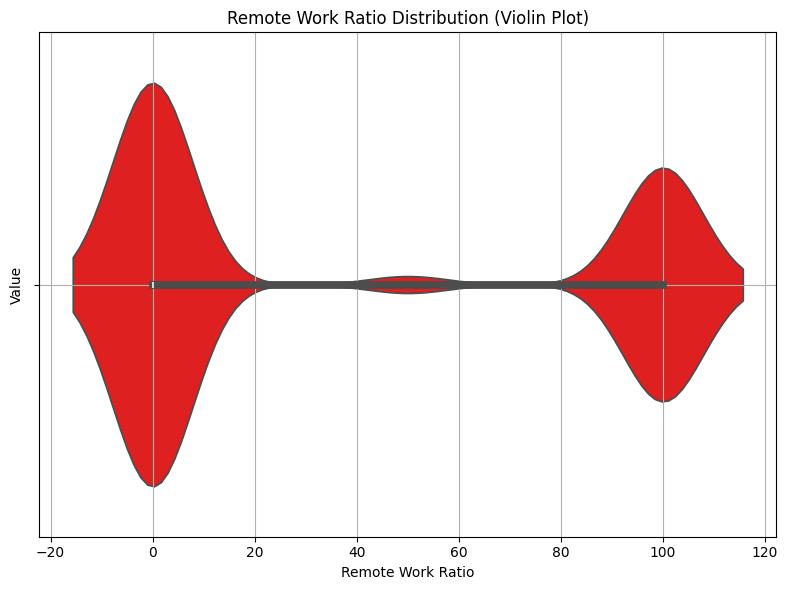

In [11]:
# Remote Work Ratio Distribution (Violin Plot)
plt.figure(figsize=(8, 6))
sns.violinplot(x=df['Remote_Ratio'], color='red')
plt.title('Remote Work Ratio Distribution (Violin Plot)')
plt.xlabel('Remote Work Ratio')
plt.ylabel('Value')
plt.grid(True)
plt.tight_layout()
plt.show()

Remote_Ratio
0      5157
100    2987
50      216
Name: count, dtype: int64


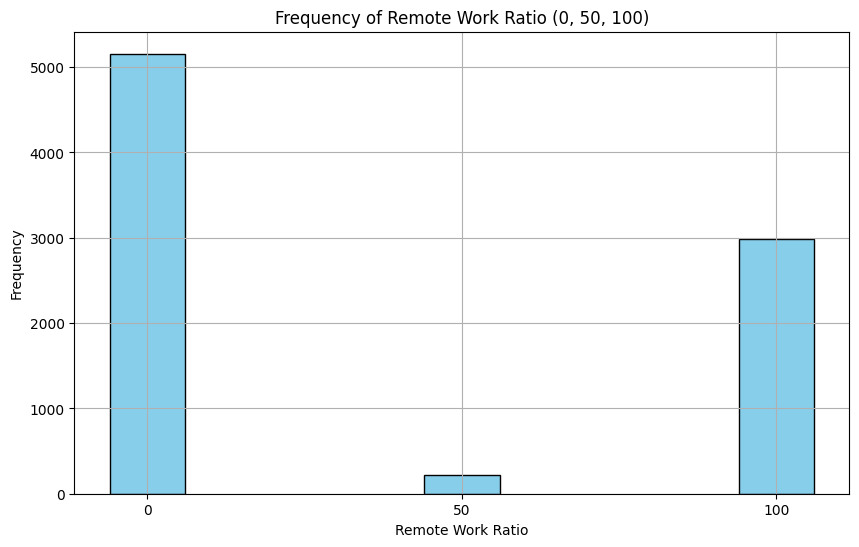

In [12]:
# Calculate the frequency of values in the 'Remote_Ratio' column
remote_ratio_counts = df['Remote_Ratio'].value_counts()
print(remote_ratio_counts)

# Plot bar plot for the Remote values
plt.figure(figsize=(10,6))
plt.bar(remote_ratio_counts.index, remote_ratio_counts.values, color='skyblue', edgecolor='black', width=12)
plt.xlabel('Remote Work Ratio')
plt.ylabel('Frequency')
plt.title('Frequency of Remote Work Ratio (0, 50, 100)')
plt.xticks(remote_ratio_counts.index)
plt.grid(True)
plt.show()

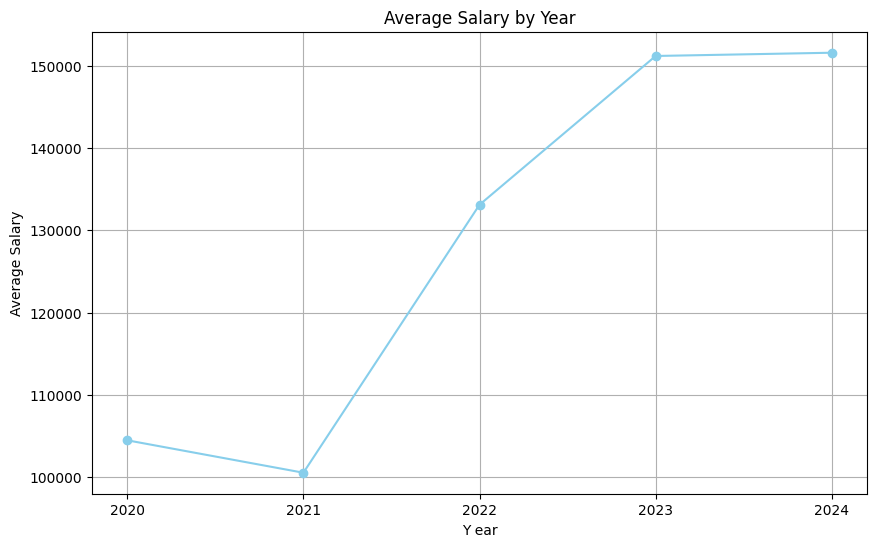

In [13]:
average_salary_year = df.groupby('Work_Year')['Salary_in_USD'].mean()

# Plot the average salary for each year
plt.figure(figsize=(10, 6))
plt.plot(average_salary_year.index, average_salary_year.values, marker='o', color='skyblue', linestyle='-')
plt.xlabel('Y ear')
plt.ylabel('Average Salary')
plt.title('Average Salary by Year')
plt.grid(True)

# Set x-axis ticks to integer values
plt.xticks(average_salary_year.index)

plt.show()

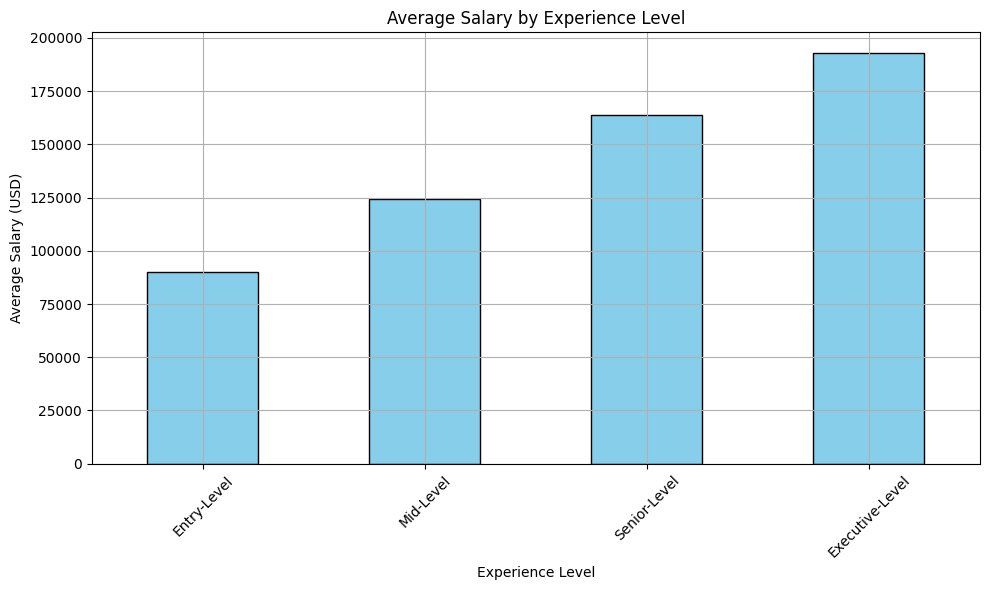

In [14]:
# Calculate the average salary for each experience level
average_salary_experience = df.groupby('Experience_Level')['Salary_in_USD'].mean()

# Define the desired order of experience levels
desired_order = ['Entry-Level', 'Mid-Level', 'Senior-Level', 'Executive-Level']

# Reindex the average salary series with the desired order
average_salary_experience = average_salary_experience.reindex(desired_order)

# Plot the average salary grouped by experience level with the desired order
plt.figure(figsize=(10, 6))
average_salary_experience.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Salary by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Average Salary (USD)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

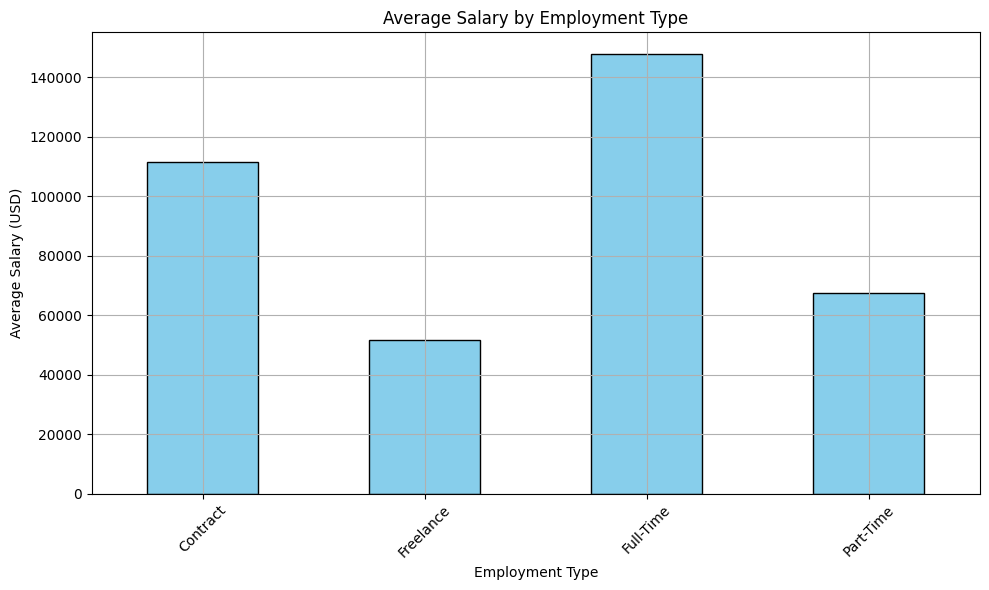

In [15]:
# Calculate the average salary for each employment type
average_salary_employment = df.groupby('Employment_Type')['Salary_in_USD'].mean()

# Plot the average salary grouped by employment type
plt.figure(figsize=(10, 6))
average_salary_employment.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Salary by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Average Salary (USD)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


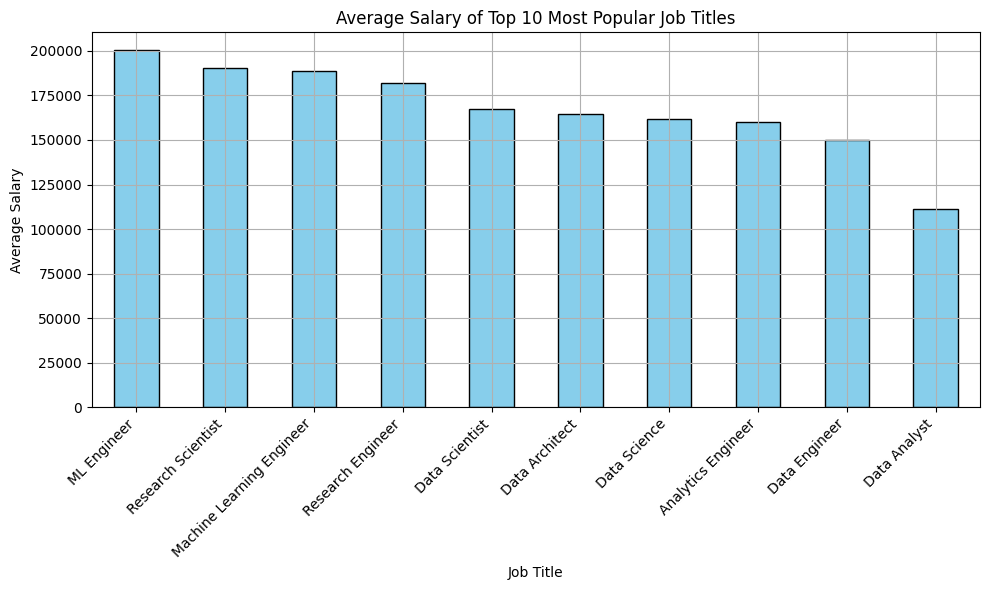

In [16]:
# Filter the DataFrame for the top 10 most popular job titles
top_job_titles_index = df['Job_Title'].value_counts().head(10).index
df_top_jobs = df[df['Job_Title'].isin(top_job_titles_index)]

# Grouping the filtered data by job title and calculating the mean salary
average_salary_by_job = df_top_jobs.groupby('Job_Title')['Salary'].mean().sort_values(ascending=False)

# Plotting the bar plot
plt.figure(figsize=(10, 6))
average_salary_by_job.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Salary of Top 10 Most Popular Job Titles')
plt.xlabel('Job Title')
plt.ylabel('Average Salary')
plt.xticks(rotation=45, ha='right')  # Rotate x-labels for better visibility
plt.grid(True)
plt.tight_layout()
plt.show()


In [17]:
# Replace 'ML Engineer' with 'Machine Learning Engineer'
df['Job_Title'] = df['Job_Title'].replace('ML Engineer', 'Machine Learning Engineer')

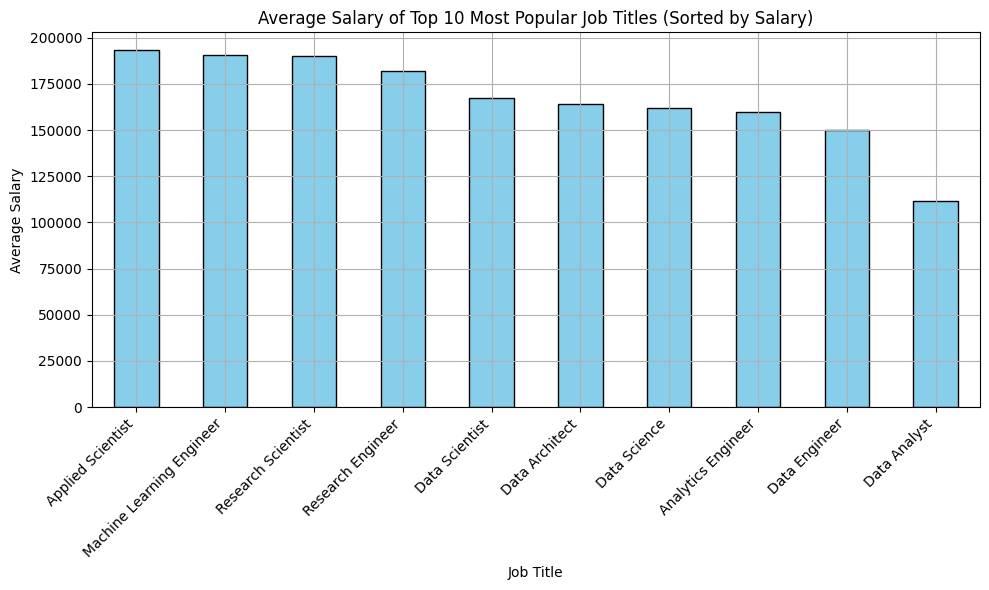

In [18]:
# Filter the DataFrame for the top 10 most popular job titles
top_job_titles_index = df['Job_Title'].value_counts().head(10).index
df_top_jobs = df[df['Job_Title'].isin(top_job_titles_index)]

# Grouping the filtered data by job title and calculating the mean salary
average_salary_by_job = df_top_jobs.groupby('Job_Title')['Salary'].mean().sort_values(ascending=False)

# Plotting the bar plot
plt.figure(figsize=(10, 6))
average_salary_by_job.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Salary of Top 10 Most Popular Job Titles (Sorted by Salary)')
plt.xlabel('Job Title')
plt.ylabel('Average Salary')
plt.xticks(rotation=45, ha='right')  # Rotate x-labels for better visibility
plt.grid(True)
plt.tight_layout()
plt.show()


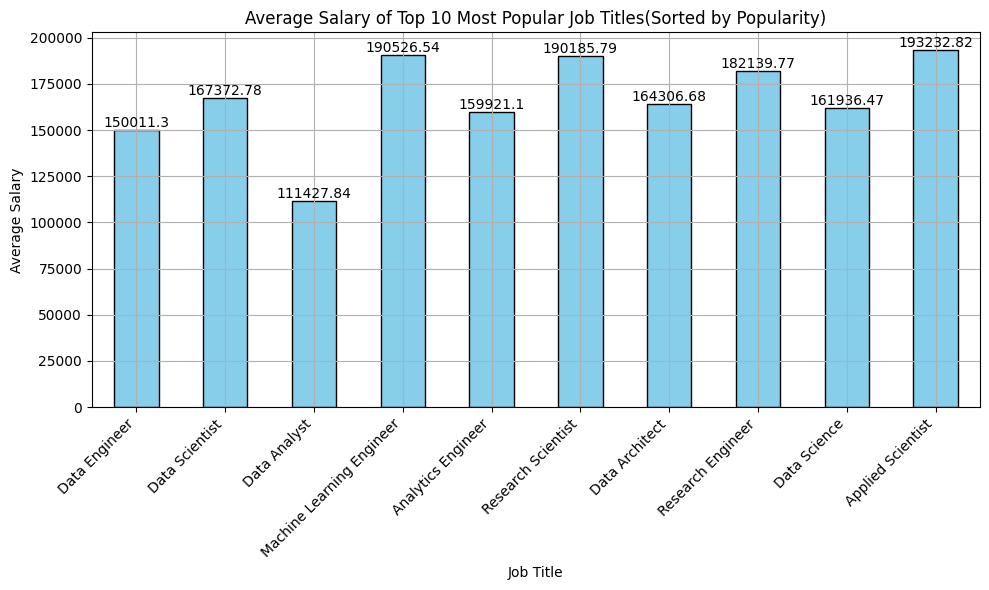

In [19]:
# Filter the DataFrame for the top 10 most popular job titles
top_job_titles_index = df['Job_Title'].value_counts().head(10).index
df_top_jobs = df[df['Job_Title'].isin(top_job_titles_index)]

# Grouping the filtered data by job title and calculating the mean salary
average_salary_by_job = df_top_jobs.groupby('Job_Title')['Salary'].mean().sort_values(ascending=False)

# Sort the average_salary_by_job Series based on the order of top_job_titles_index
average_salary_by_job = average_salary_by_job.loc[top_job_titles_index]

# Plotting the bar plot
plt.figure(figsize=(10, 6))
average_salary_by_job.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Salary of Top 10 Most Popular Job Titles(Sorted by Popularity)')
plt.xlabel('Job Title')
plt.ylabel('Average Salary')
plt.xticks(rotation=45, ha='right')  # Rotate x-labels for better visibility

# Add numbers for each bar
for i, v in enumerate(average_salary_by_job):
    plt.text(i, v + 0.5, str(round(v, 2)), ha='center', va='bottom')

plt.grid(True)
plt.tight_layout()
plt.show()
